# Final Visualizations

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to instacart folder

path = r'/Users/mitchellkubik/Desktop/08-2023 Instacart Basket Analysis'

In [3]:
# Import current dataframe

df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 Coding Etiquette & Excel Reporting', 'df_final.pkl'))

In [4]:
pd.set_option('display.max_columns',(None))

In [5]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7

In [6]:
# Store 30% of the sample in the dataframe small

small = df_final[~dev]

In [7]:
big = df_final[dev]

In [8]:
len(df_final)

30964564

In [9]:
df_small = small[['orders_day_of_week', 'avg_price']]

In [10]:
df_final['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [11]:
department_frequency = df_final['department'].value_counts

In [12]:
department_frequency_bar = department_frequency.plot.bar()
plt.title('Department Sales')

AttributeError: 'function' object has no attribute 'plot'

Text(0.5, 1.0, 'Department Sales')

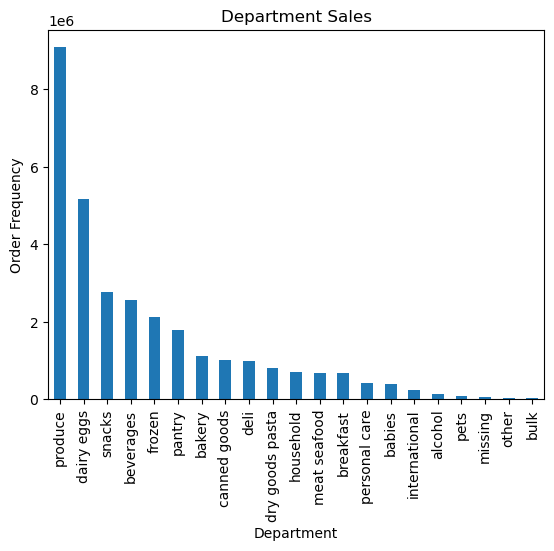

In [13]:
df_final['department'].value_counts().plot.bar()
plt.xlabel('Department')
plt.ylabel('Order Frequency')
plt.title('Department Sales')

In [14]:
loyalty_demographic_crosstab = pd.crosstab(df_final['loyalty_flag'], df_final['fam_status'], dropna = False)

Text(0, 0.5, 'Total')

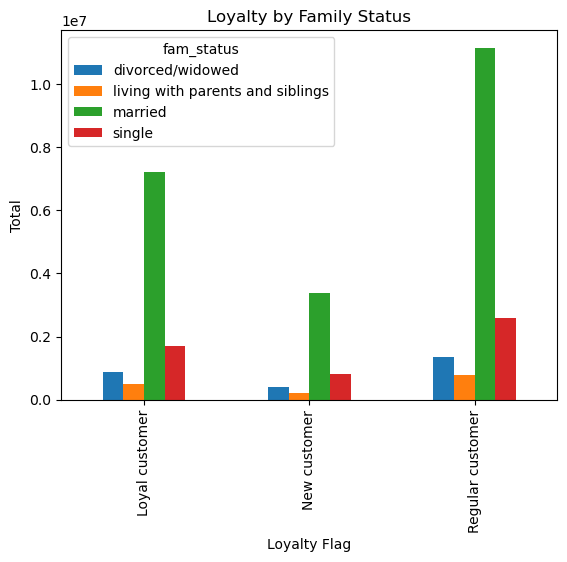

In [15]:
loyalty_demographic_bar = loyalty_demographic_crosstab.sort_index(ascending = True).plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('Loyalty Flag')
plt.ylabel('Total')

In [16]:
loyalty_department_crosstab = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna = False)

In [17]:
loyalty_department_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


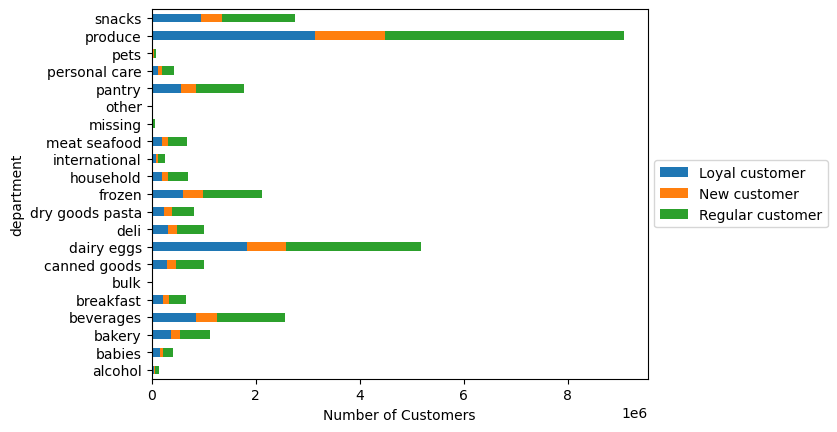

In [18]:
loyalty_dept_bar = loyalty_department_crosstab.plot.barh(stacked = True)
plt.xlabel('Number of Customers')
plt.ylabel('department')
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

In [19]:
hour_price_order_freq = pd.crosstab(df_final['order_hour_of_day'], df_final['price_range_loc'], dropna =False)

In [20]:
hour_price_order_freq

price_range_loc,high range product,low range product,mid range product
order_hour_of_day,,,
0,2644,64819,140579
1,1335,34033,74253
2,885,20622,44184
3,611,15029,33156
4,664,15711,34388
5,1018,26074,57326
6,3622,86902,190489
7,11274,267170,584769
8,21155,518313,1119642


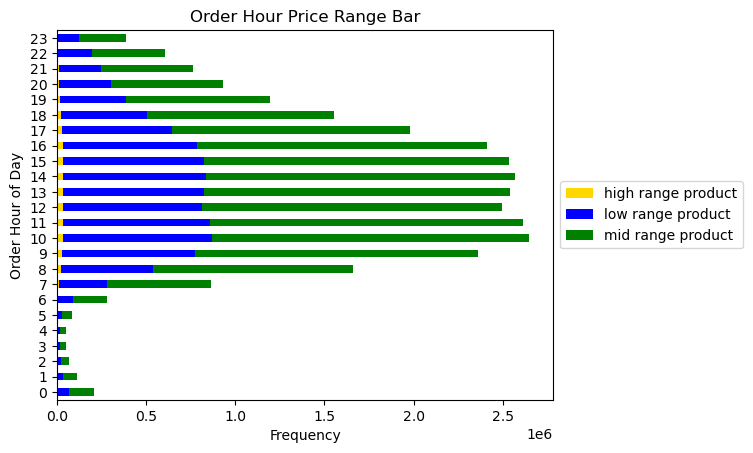

In [21]:
hour_price_order_freq_bar = hour_price_order_freq.plot.barh(stacked = True, color = ['gold', 'blue', 'green'])
plt.title('Order Hour Price Range Bar')
plt.xlabel('Frequency')
plt.ylabel('Order Hour of Day')
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

In [22]:
mean = np.mean(df_final['order_hour_of_day'].value_counts(dropna = False))

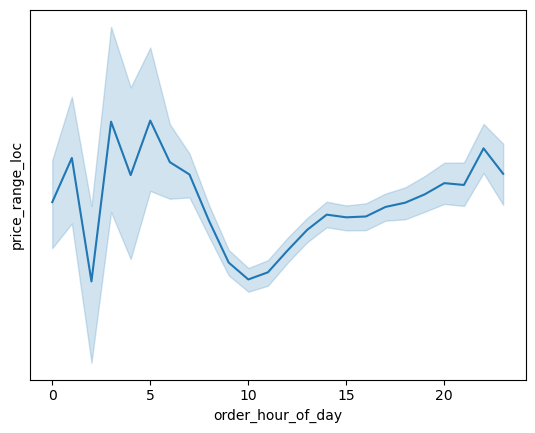

In [23]:
line = sns.lineplot(data = df_final, x = 'order_hour_of_day', y = 'price_range_loc')

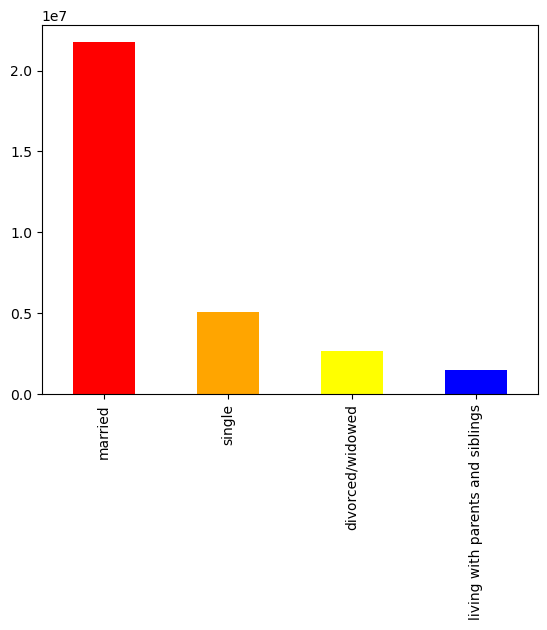

In [26]:
fam_stat_bar = df_final['fam_status'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'blue'])